# Analiza podatkov s pandas

[Pandas quick-start guide](http://pandas.pydata.org/pandas-docs/stable/10min.html)  
[Pandas documentation](http://pandas.pydata.org/pandas-docs/stable/)  
[Lecture notes on pandas](../predavanja/Analiza podatkov s knjižnico Pandas.ipynb)


### Naložimo pandas in podatke

In [1]:
# naložimo paket
import pandas as pd
import numpy as np 

# ker bomo delali z velikimi razpredelnicami, povemo, da naj se vedno izpiše le 10 vrstic
pd.options.display.max_rows =10

# izberemo interaktivni "notebook" stil risanja
%matplotlib inline
# naložimo razpredelnico, s katero bomo delali
filmi = pd.read_csv("../../02-zajem-podatkov/predavanja/obdelani-podatki/filmi.csv")
filmi = filmi[[j%3 ==0 for j in range(10000)]]

Poglejmo si podatke.

In [2]:
pd.__version__;
list(range(10))
filmi

,id,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,oznaka,opis
0,4972,The Birth of a Nation,195,1915,6.4,NaN,20737,10000000.0,NaN,The Stoneman family finds its friendship with ...
3,10323,Das Cabinet des Dr. Caligari,76,1920,8.1,NaN,50866,NaN,NaN,"Hypnotist Dr. Caligari uses a somnambulist, Ce..."
6,13086,"Dr. Mabuse, der Spieler",242,1922,7.9,NaN,6751,NaN,NaN,Arch-criminal Dr. Mabuse sets out to make a fo...
9,14429,Resitev v zadnjem trenutku,74,1923,8.1,NaN,16662,623809.0,NaN,A boy leaves his small country town and heads ...
12,15324,Sherlock Jr.,45,1924,8.2,NaN,34452,977375.0,NaN,"A film projectionist longs to be a detective, ..."
...,...,...,...,...,...,...,...,...,...,...
9987,8637428,The Farewell,100,2019,8.1,89.0,6892,16877010.0,PG,A Chinese family discovers their grandmother h...
9990,8772262,Midsommar,147,2019,7.5,72.0,39422,27331977.0,R,A couple travels to Sweden to visit a rural ho...
9993,9024106,Unplanned,109,2019,5.8,10.0,9839,18988743.0,R,All Abby Johnson ever wanted to do was help wo...
9996,9419834,Secret Obsession,97,2019,4.3,NaN,13308,NaN,NaN,"Recuperating from trauma, Jennifer remains in ..."


## Proučevanje podatkov

Razvrstite podatke po ocenah.

In [3]:
filmi.sort_values(["ocena", "glasovi"])

,id,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,oznaka,opis
9726,6038600,Smolensk,120,2016,1.4,NaN,7417,NaN,NaN,Inspired by true events of 2010 Polish Air For...
9237,4009460,Saving Christmas,79,2014,1.4,18.0,14365,2783970.0,PG,His annual Christmas party faltering thanks to...
9354,4458206,Kod Adi K.O.Z.,114,2015,1.4,NaN,26817,NaN,NaN,A look at the 17-25 December 2013 corruption s...
4173,249516,Foodfight!,91,2012,1.6,NaN,8713,NaN,PG,The evil Brand X joins a supermarket that beco...
6114,808240,Dünyayi Kurtaran Adam'in Oglu,110,2006,1.7,NaN,15223,NaN,NaN,A family of Turks try to adapt to life in a ne...
...,...,...,...,...,...,...,...,...,...,...
4212,253779,Süt Kardesler,80,1976,8.9,NaN,16973,NaN,NaN,"Saban, Ramazan and Bayram are sailors in an Ot..."
2658,108052,Schindlerjev seznam,195,1993,8.9,94.0,1109052,96898818.0,R,"In German-occupied Poland during World War II,..."
2814,110912,Šund,154,1994,8.9,94.0,1677219,107928762.0,R,"The lives of two mob hitmen, a boxer, a gangst..."
4197,252488,Hababam Sinifi Sinifta Kaldi,91,1976,9.0,NaN,19894,NaN,NaN,A young and beautiful female teacher starts wo...


Poberite stolpec ocen.

In [4]:
filmi[["ocena", "glasovi"]]

,ocena,glasovi
0,6.4,20737
3,8.1,50866
6,7.9,6751
9,8.1,16662
12,8.2,34452
...,...,...
9987,8.1,6892
9990,7.5,39422
9993,5.8,9839
9996,4.3,13308


Ukaza `filmi['ocena']` in `filmi[['ocena']]` sta različna:

In [5]:
print(type(filmi['ocena'])) # dobis dva podatka, tabelo
print(type(filmi[['ocena']])) # dobis samo en podatek dataframe

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


Stolpci objekta `DataFrame` so tipa `Series`. Z enojnimi oklepaji poberemo `Series`, z dvojnimi oklepaji pa `DataFrame` podtabelo. Večina operacij (grouping, joining, plotting,  filtering, ...) deluje na `DataFrame`. 

Tip `Series` se uporablja ko želimo npr. dodati stolpec.

Zaokrožite stolpec ocen z funkcijo `round()`.

In [6]:
ocene_rounded = round( filmi["ocena"])
ocene_rounded

0       6.0
3       8.0
6       8.0
9       8.0
12      8.0
       ... 
9987    8.0
9990    8.0
9993    6.0
9996    4.0
9999    8.0
Name: ocena, Length: 3334, dtype: float64

In [7]:
filmi['rounded_ocene' ]= ocene_rounded # enako št vrstic, lahko dodamo stolpec
filmi 

,id,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,oznaka,opis,rounded_ocene
0,4972,The Birth of a Nation,195,1915,6.4,NaN,20737,10000000.0,NaN,The Stoneman family finds its friendship with ...,6.0
3,10323,Das Cabinet des Dr. Caligari,76,1920,8.1,NaN,50866,NaN,NaN,"Hypnotist Dr. Caligari uses a somnambulist, Ce...",8.0
6,13086,"Dr. Mabuse, der Spieler",242,1922,7.9,NaN,6751,NaN,NaN,Arch-criminal Dr. Mabuse sets out to make a fo...,8.0
9,14429,Resitev v zadnjem trenutku,74,1923,8.1,NaN,16662,623809.0,NaN,A boy leaves his small country town and heads ...,8.0
12,15324,Sherlock Jr.,45,1924,8.2,NaN,34452,977375.0,NaN,"A film projectionist longs to be a detective, ...",8.0
...,...,...,...,...,...,...,...,...,...,...,...
9987,8637428,The Farewell,100,2019,8.1,89.0,6892,16877010.0,PG,A Chinese family discovers their grandmother h...,8.0
9990,8772262,Midsommar,147,2019,7.5,72.0,39422,27331977.0,R,A couple travels to Sweden to visit a rural ho...,8.0
9993,9024106,Unplanned,109,2019,5.8,10.0,9839,18988743.0,R,All Abby Johnson ever wanted to do was help wo...,6.0
9996,9419834,Secret Obsession,97,2019,4.3,NaN,13308,NaN,NaN,"Recuperating from trauma, Jennifer remains in ...",4.0


Odstranite novo dodani stolpec z metodo `.drop()` z podanim `columns = ` argumentom.

In [8]:
filmi.drop(columns = 'rounded_ocene')

,id,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,oznaka,opis
0,4972,The Birth of a Nation,195,1915,6.4,NaN,20737,10000000.0,NaN,The Stoneman family finds its friendship with ...
3,10323,Das Cabinet des Dr. Caligari,76,1920,8.1,NaN,50866,NaN,NaN,"Hypnotist Dr. Caligari uses a somnambulist, Ce..."
6,13086,"Dr. Mabuse, der Spieler",242,1922,7.9,NaN,6751,NaN,NaN,Arch-criminal Dr. Mabuse sets out to make a fo...
9,14429,Resitev v zadnjem trenutku,74,1923,8.1,NaN,16662,623809.0,NaN,A boy leaves his small country town and heads ...
12,15324,Sherlock Jr.,45,1924,8.2,NaN,34452,977375.0,NaN,"A film projectionist longs to be a detective, ..."
...,...,...,...,...,...,...,...,...,...,...
9987,8637428,The Farewell,100,2019,8.1,89.0,6892,16877010.0,PG,A Chinese family discovers their grandmother h...
9990,8772262,Midsommar,147,2019,7.5,72.0,39422,27331977.0,R,A couple travels to Sweden to visit a rural ho...
9993,9024106,Unplanned,109,2019,5.8,10.0,9839,18988743.0,R,All Abby Johnson ever wanted to do was help wo...
9996,9419834,Secret Obsession,97,2019,4.3,NaN,13308,NaN,NaN,"Recuperating from trauma, Jennifer remains in ..."


### Opomba: slice
Izbira podtabele ustvari t.i. "rezino" oz. "slice".
Slice ni kopija tabele, temveč zgolj sklic na izvorno tabelo,
in je zato ne moremo spreminjati.
Če želimo kopijo, uporabimo metodo `.copy()` na rezini, ki jo nato lahko spreminjamo.


Izberite podtabelo s stolpci `naslov`, `leto`, in `glasovi`, kateri nato dodate solpec z zaokroženimi ocenami.

In [9]:
core_filmi = filmi[["naslov", "leto", "glasovi"]]

### Filtracija

Ustvarite filter, ki izbere filme, ki so izšli pred 1930, in filter za filme po 2017.
Združite ju za izbor filmov, ki so izšli pred 1930 ali po 2017.

In [10]:
before = filmi["leto"] <= 1930
after = filmi["leto"]>=2017
filmi[before | after] #before or after

,id,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,oznaka,opis,rounded_ocene
0,4972,The Birth of a Nation,195,1915,6.4,NaN,20737,10000000.0,NaN,The Stoneman family finds its friendship with ...,6.0
3,10323,Das Cabinet des Dr. Caligari,76,1920,8.1,NaN,50866,NaN,NaN,"Hypnotist Dr. Caligari uses a somnambulist, Ce...",8.0
6,13086,"Dr. Mabuse, der Spieler",242,1922,7.9,NaN,6751,NaN,NaN,Arch-criminal Dr. Mabuse sets out to make a fo...,8.0
9,14429,Resitev v zadnjem trenutku,74,1923,8.1,NaN,16662,623809.0,NaN,A boy leaves his small country town and heads ...,8.0
12,15324,Sherlock Jr.,45,1924,8.2,NaN,34452,977375.0,NaN,"A film projectionist longs to be a detective, ...",8.0
...,...,...,...,...,...,...,...,...,...,...,...
9987,8637428,The Farewell,100,2019,8.1,89.0,6892,16877010.0,PG,A Chinese family discovers their grandmother h...,8.0
9990,8772262,Midsommar,147,2019,7.5,72.0,39422,27331977.0,R,A couple travels to Sweden to visit a rural ho...,8.0
9993,9024106,Unplanned,109,2019,5.8,10.0,9839,18988743.0,R,All Abby Johnson ever wanted to do was help wo...,6.0
9996,9419834,Secret Obsession,97,2019,4.3,NaN,13308,NaN,NaN,"Recuperating from trauma, Jennifer remains in ...",4.0


Definirajte funkcijo, ki preveri ali niz vsebuje kvečjemu dve besedi. Nato s pomočjo `.apply()` izberite vse filme z imeni krajšimi od dveh besed in oceno nad 8.

In [11]:
 def short_name(x, num = 2):
        len(x.split())<=num
kratka_imena = filmi['naslov'].apply(short_name)
well_rated = filmi['ocena'] > 8 

### Histogrami

Združite filme po ocenah in jih preštejte.

In [12]:
po_ocenah = filmi.groupby('ocena').size()

Naredite stolpični diagram teh podatkov.

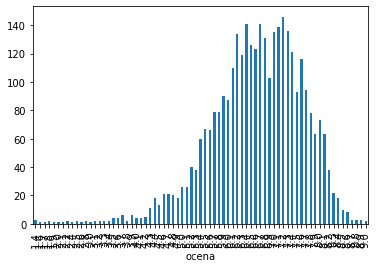

In [13]:
po_ocenah.plot.bar()

Tabele imajo metodo `.hist()`, ki omogoča izgradnjo histogramov za stolpce. Uporabite to metodo za prikaz poenostavljenih podatkov.

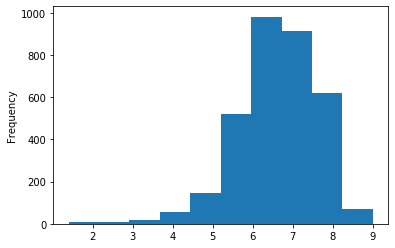

In [14]:
%matplotlib inline
filmi['ocena'].plot.hist()

### Izris povprečne dolžine filma glede na leto

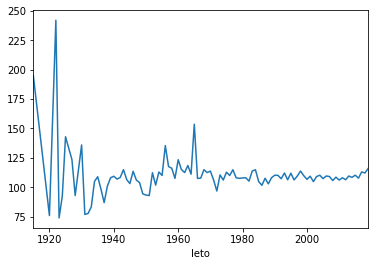

In [15]:
(filmi.groupby('leto').mean()['dolzina']).plot() # imas namesto .mean, tudi druge npr: .maxx,.minn

### Izris skupnega zasluzka za posamezno leto